In [231]:
import pandas as pd
import numpy as np                   #For Maths Operations 
import matplotlib.pyplot as plt      #For ploting the graphs 
import seaborn as sns                #For Data Visulization

%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')  #To ignore the Warnings

pd.set_option('display.max_columns',None)  #To Disply All columns

In [232]:
#Lets read-in the Traininga and test data
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [233]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis

## 1. Univariate Analysis

In [236]:
#Lets make a copy of our train and test datasets 
train_original=train.copy()
test_original=test.copy()

In Univariate Analysis, will eximine each feature indivisually. 
For Catogorical varibales, we may use Frequency Table or bar plots which will count the number of catogories in each varible.
For Numerical varibles, we may use probability Density plots to check the distribution of the variable.

### Target Varible

In [237]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [238]:
# normalize can be set to True to see proportion instead of numbers. 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

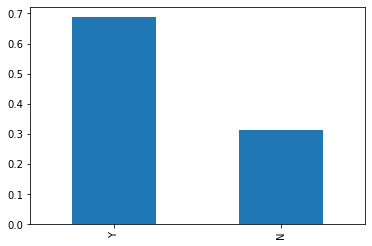

In [239]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

Loan of around 422 (Around 69%) of people got approved from 614. 

In [240]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Now Lets Visualize each varible seperatly. This Dataset has following types of features---<br>
1. Catogorical----Gender,Married,Self_Employed,Credit_History,Loan_Status<br>
2. Ordinal-----Dependents,Education,Property_Area<br>
3. Numerical-----ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term<br>

##### Let's Visulize Categorical and Ordinal features first !!<br>

### Categorical Features

Use Of Subplot-----
You have three numbers that are used within subplot. subplot places multiple figures within the same window. You can place plots within a m x n grid, where m contains the number of rows and n contains the number of columns in your figure. p determines where you want to place your plot within the grid. The number p increases from 1 up to m x n, and the plots are placed from left to right, and top to bottom.

In this case, when you do subplot(1,2,1); or subplot(121);, you would like to have one row and two columns worth of figures. The last number, p=1 means that you wish to place the plot in the left most column. When you do subplot(1,2,2); or subplot(122);, this is when p=2 and you wish to place the plot in the right most column.

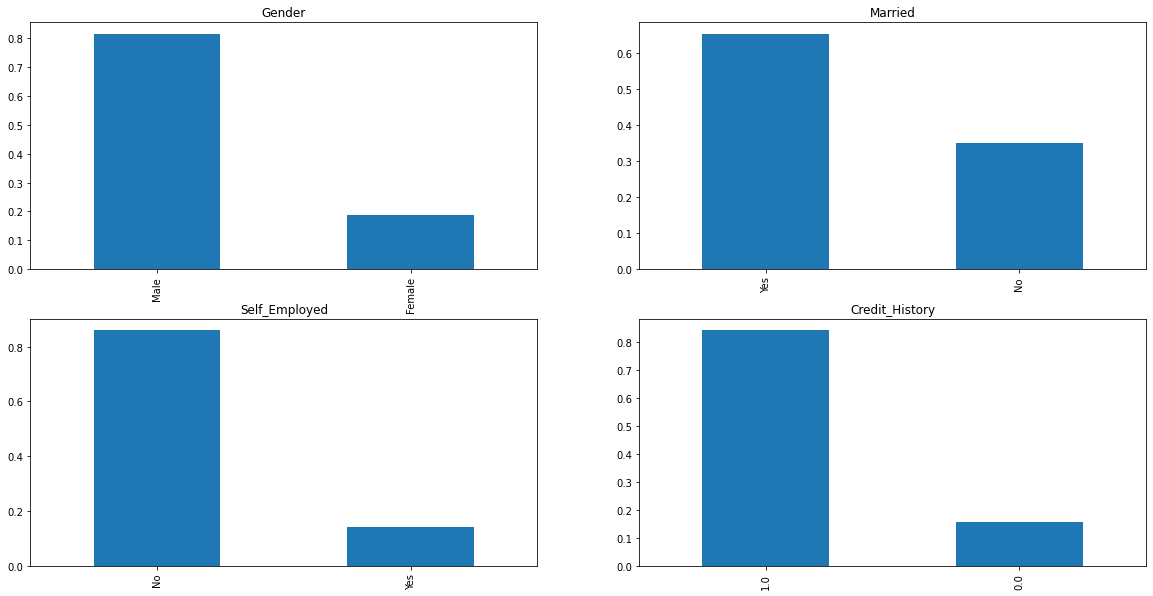

In [241]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

plt.show()

#### It can be infered from above bar plots ---<br>
1. Around 80% applicants are male.<br>
2. Around 65% of applicants are married.<br>
3. Only around 15% of applicants are Self_Employed.<br>
4. Around 85% of applicants are having Credit_history.<br>

### Ordinal Features

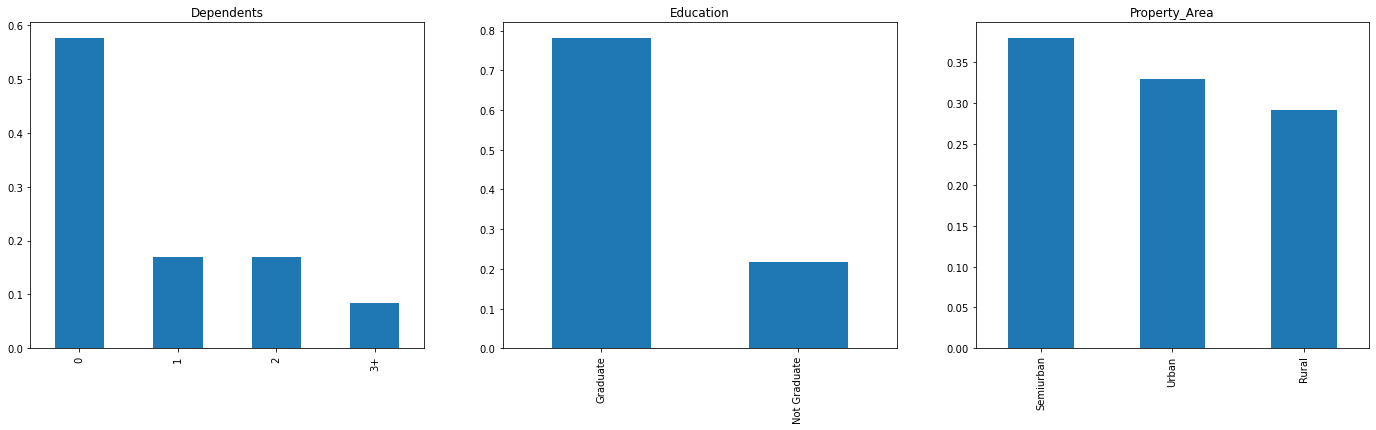

In [242]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Property_Area')

plt.show()

#### It can be infered from above bar plots ---<br>
1. Most of the applicants do not have any dependents.<br>
2. Most of the applicants are graduate. Around 75%.<br>
3. Most of the applicats are from Semiurban area.<br>

 ### Numerical Features

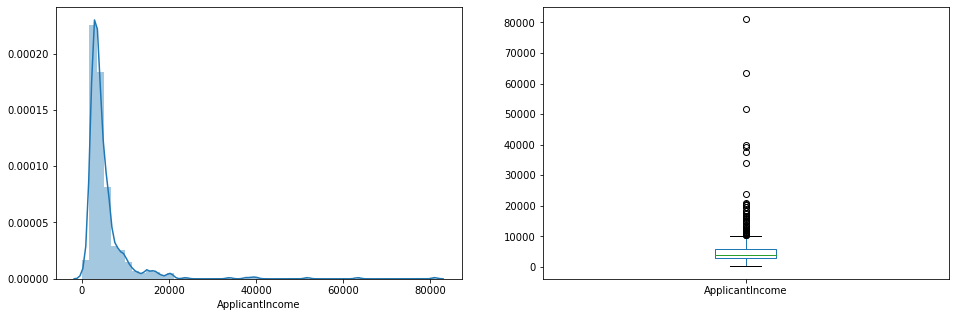

In [243]:
#Now let's visualize Distribution of numerical features 
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

#### From above distribution plot, it can be infered that----<br>
1. ApplicantsIncome is not normally disrtibuted. It has long tail towards right means the data is right skewed<br>
2. Normaly distributed data performs better with the algorithms.<br>
3. The Box plot confirms that there are outliers in the applicantsIncome. That means few people have more income.<br>
4. It may be because we are seeing data of different Educational background.<br>

Text(0.5, 0.98, '')

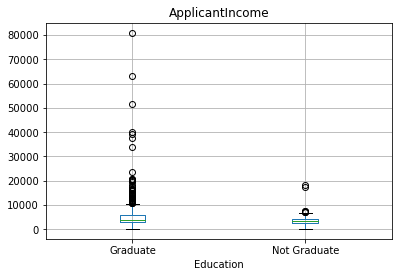

In [244]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

#### So we can say...<br>
1. Graduate people are having more diversed income than the non Gradute.<br>

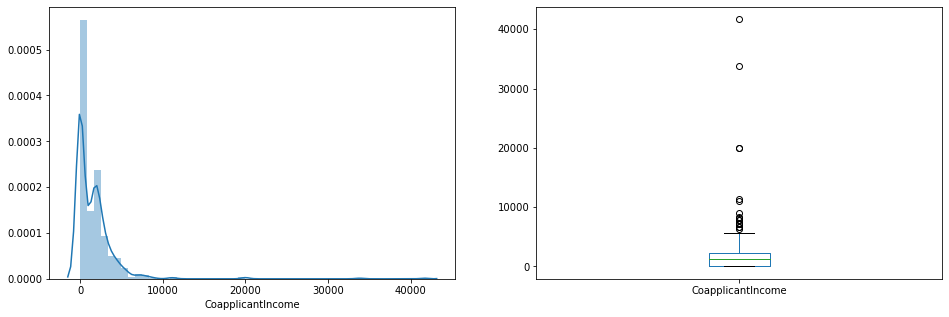

In [245]:
#Now Lets look at the Coapplicats income distribution. 
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

This Data is also not normaly distributed. and there are some outliers as well. 

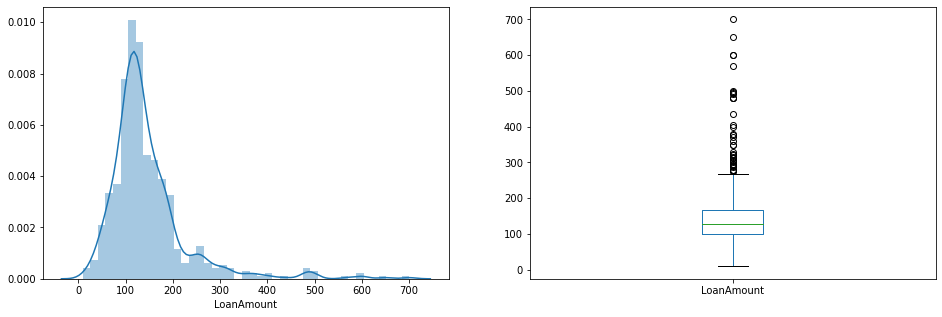

In [246]:
#Now Lets see distribution of Loan amount.
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see the distribution of this plot is fairly Normal but it has many outliers. 

In [247]:
#Let's see some stats of the data
train['Credit_History']=train['Credit_History'].astype('O')
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [248]:
#We could see that mean and std deviation are affected by outliers. 

## 2. Bivariate Analysis

In Bivariate analysis, we explore each varible with respect to Target Varibale.

In [249]:
#Lets Do it for Catogorical Varibales. Will have to Convert values of Target Variable.

values={'Y':1,'N':0}
train['Loan_Status']=train['Loan_Status'].map(values)

<Figure size 432x288 with 0 Axes>

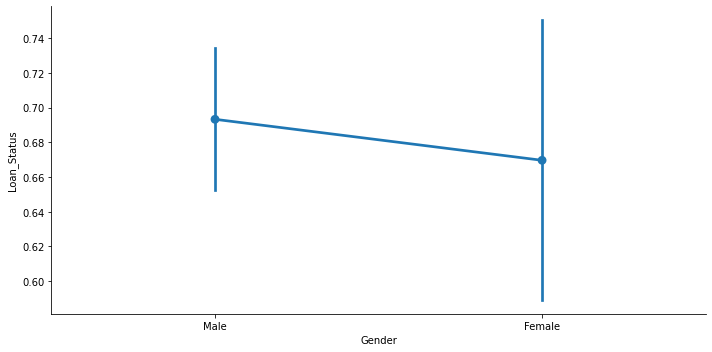

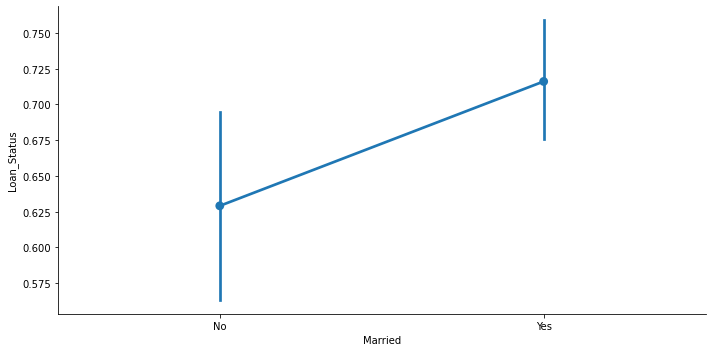

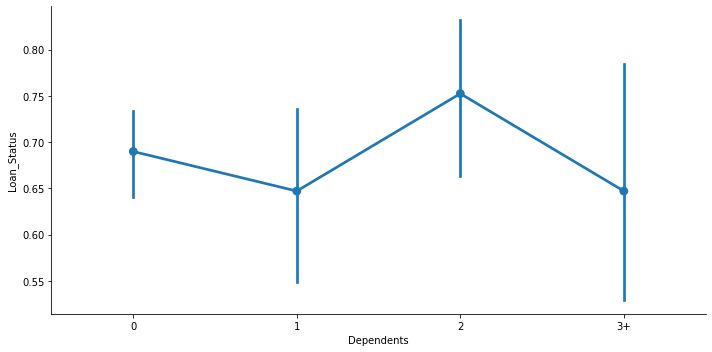

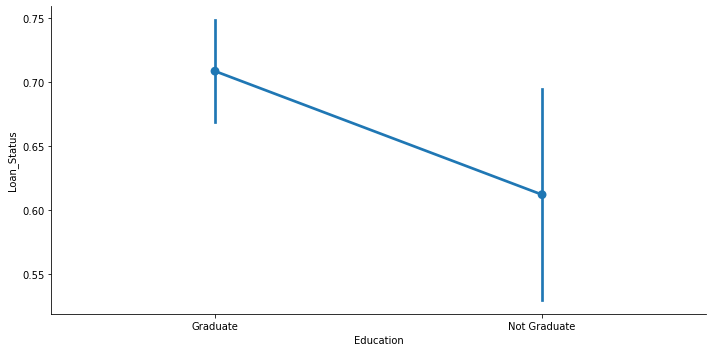

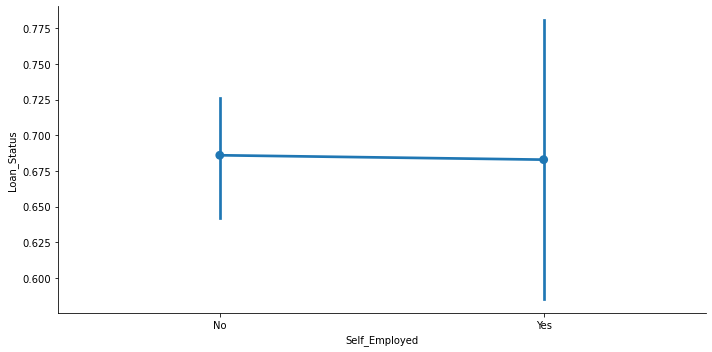

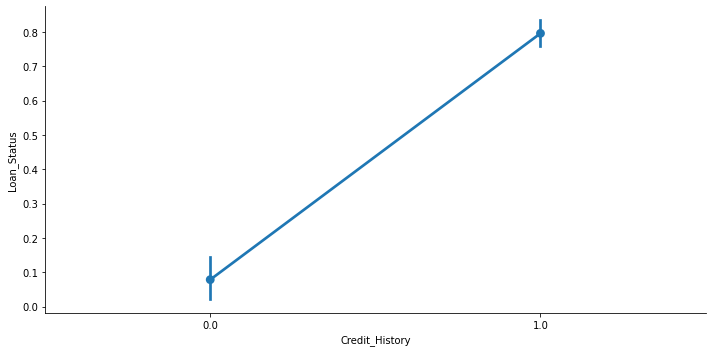

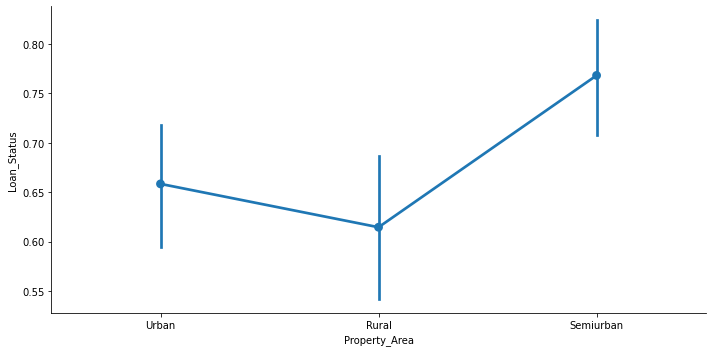

In [250]:
#The Points on the graph represent the percentage of Applicants whoes loan is approved at each level of the input feature.
#The verticle bar represent the error.So if have lot of data for given level,the verticle bar will be small.indicating that we are quite confident.
#If we have limited data, the verticle bar would be lagre.


for i, col in enumerate(['Gender', 'Married', 'Dependents','Education','Self_Employed','Credit_History','Property_Area']):
    plt.figure(i)
    sns.catplot(x=col, y='Loan_Status', data=train, kind='point', aspect=2,)

#### From the above plots, we can get that ---<br>
1. Credit_History feature stands out well. Applicants with Credit_History 1 having more chances of getting the loan.<br>
2. Applicants who are graduates are having more chances of getting loan.<br>
3. The rest of the features does not stands out.<br>

Let us look at the stacked bar plots which will, give us proportion of approved and unapproved loans. 

#### Categorical independent varible Vs Target varible 

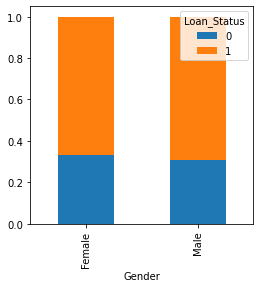

In [251]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

#It can be infered that the proportion of Approved and unapproved for male and female is moreover same. 

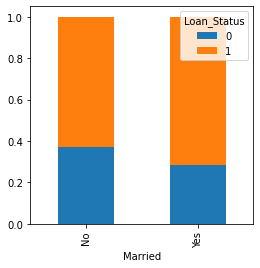

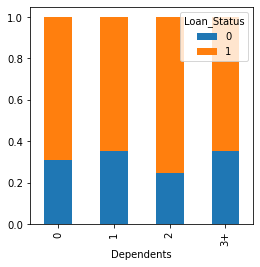

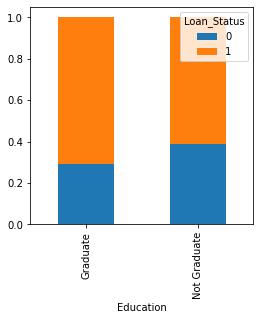

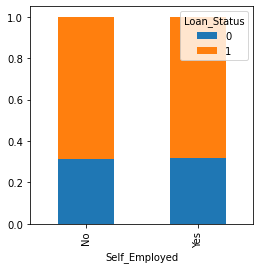

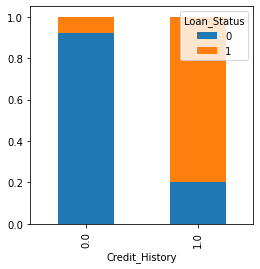

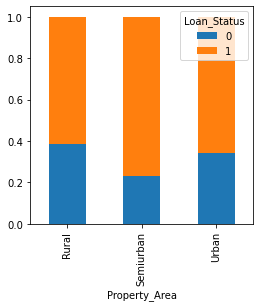

In [252]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#### Numerical Independent variable Vs Target Variable

Lets see the mean of applicant's Income for which Loan is approved and mean of applican't income for which loan was not approved. 

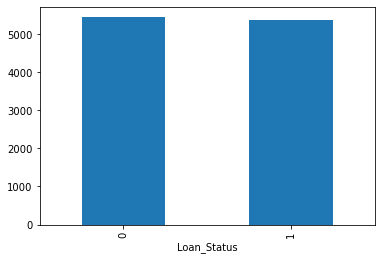

In [253]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We Does not see any difference here. That means Applicants Income does not affect the Loan Status. But This sounds incorrect. 

Let's creat a bins of applicant's income based on values in it and then analyse.

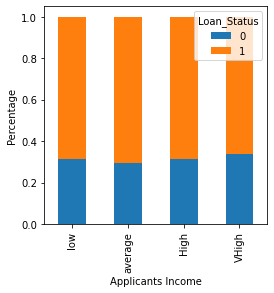

In [254]:
bins=[0,2500,4000,6000,81000]
groups=['low','average','High','VHigh']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=groups)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicants Income')
plt.ylabel('Percentage')
plt.show()

From the above observation, we could conclude that applicants_Income does not decide the loan status.</br>

Now Lets Examine Coapplicants Income.</br>

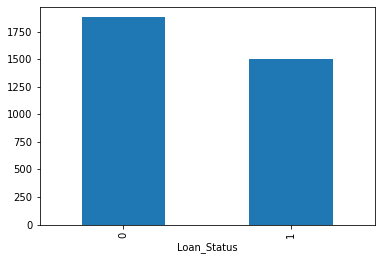

In [255]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

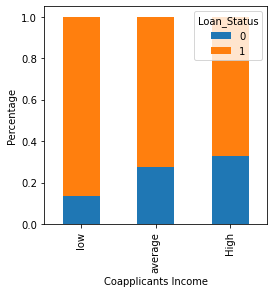

In [256]:
bins=[0,1000,3000,42000]
groups=['low','average','High']
train['Co_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)

Co_Income_bin=pd.crosstab(train['Co_Income_bin'],train['Loan_Status'])
Co_Income_bin.div(Co_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Coapplicants Income')
plt.ylabel('Percentage')
plt.show()

From above, we could infer that if co-applicants income is less the chances of loan get approved is more, which look incorrect.
It may be because most of the applicants do not have any dependents, so there coapplicants income is 0. 

We could create a new varibale by summing applicants and coapplicants income. 

In [257]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

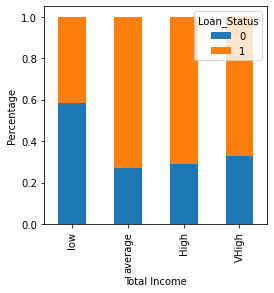

In [258]:
bins=[0,2500,4000,6000,81000]
groups=['low','average','High','VHigh']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=groups)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

We can see that when total income is low, there are more chances that loan will not approve. 

Let's visualize the Loan Amount variable now.

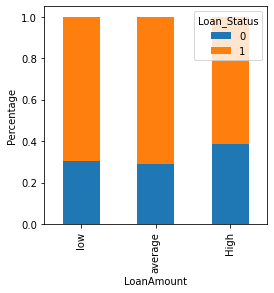

In [259]:
bins=[0,100,200,700]
groups=['low','average','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=groups)

Loan_Amount_bin=pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

We can see that if Loan Amount is high, there are more chances that loan will not approve than teh average and low. 

In [260]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_Income,Total_Income_bin,Loan_Amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,1,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,0,High,average,6091.0,VHigh,average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,1,average,NaN,3000.0,average,low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,1,average,average,4941.0,High,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,1,High,NaN,6000.0,High,average


In [261]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Co_Income_bin', 'Total_Income', 'Total_Income_bin',
       'Loan_Amount_bin'],
      dtype='object')

In [262]:
#Now Lets Drop the appended columns.
train.drop(['Income_bin', 'Co_Income_bin', 'Total_Income', 'Total_Income_bin',
       'Loan_Amount_bin'],axis=1,inplace=True)

In [263]:
#Also, there is '3+' value in Dependent feature. That we need to convert it into 3 to make it numerical.
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [264]:
#now lets look at the corelation between all the numerical varibles..
matrix=train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,-0.021268
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,1.000000


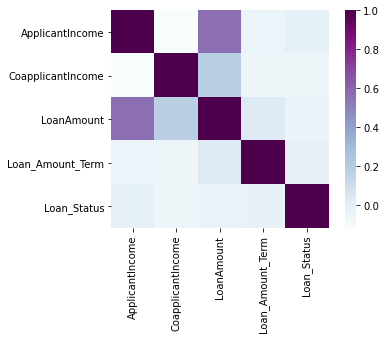

In [265]:
#HeatMap--Cotrrelation
sns.heatmap(matrix,square=True,cmap='BuPu')

#### We need to take care of two things here
1. Missing values 
2. Outliers

In [266]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [267]:
#We are gonna impute missing values by Mode for categorical and by Median for Numerical features. 
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [268]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [269]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [270]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True) #Sinec there are outliers in the Loan amount. 

In [271]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [272]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [273]:
#Lets fill the Missing values for test data aswell
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True) #Sinec there are outliers in the Loan amount.

In [274]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment 

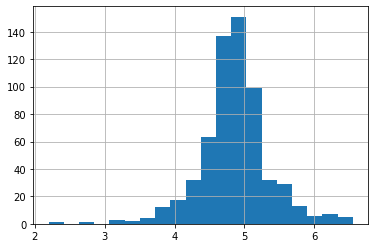

In [275]:
# We are going to use log transformation to handle the Skewness. 
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [276]:
#Similarly, Let's treat skewness for test data
test['LoanAmount_log']= np.log(test['LoanAmount'])

In [277]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [278]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [282]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID',],axis=1,inplace=True)

### Model Building

In [283]:
# Lets define predictors and Responce Varibale

x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [284]:
# Will have to convert the categorical varibles into Dummy variables. 
x_encoded=pd.get_dummies(x,drop_first=True)
train_encoded=pd.get_dummies(train,drop_first=True)
test_encoded=pd.get_dummies(test,drop_first=True)

In [285]:
x_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,1,0,0,0,0,0,1


In [286]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_encoded,y,test_size=0.25,random_state=100)

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [288]:
lr=LogisticRegression()
rc=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()

In [289]:
lr_score=cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy')
rc_score=cross_val_score(rc,x_train,y_train,cv=5,scoring='accuracy')
knn_score=cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
svc_score=cross_val_score(svc,x_train,y_train,cv=5,scoring='accuracy')

In [290]:
print (lr_score)
print ("Logistic Score:",np.round(lr_score.mean(),2))
print (rc_score)
print ("RandomForest Score:",np.round(rc_score.mean(),2))
print (rc_score)
print ("KNN Score:",np.round(knn_score.mean(),2))
print (rc_score)
print ("SVM Score:",np.round(svc_score.mean(),2))

[0.84782609 0.79347826 0.82608696 0.79347826 0.81521739]
Logistic Score: 0.82
[0.81521739 0.77173913 0.77173913 0.79347826 0.80434783]
RandomForest Score: 0.79
[0.81521739 0.77173913 0.77173913 0.79347826 0.80434783]
KNN Score: 0.63
[0.81521739 0.77173913 0.77173913 0.79347826 0.80434783]
SVM Score: 0.71


In [210]:
## From Above CV scores, We could see, Logistic is performing much better than other.

### Hyperparameter Tuning

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [293]:
lr = LogisticRegression()
parameters = {
    'penalty': ['l1','l2'],
    'C': [1,1.5,2]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 1, 'penalty': 'l2'}

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.815 (+/-0.041) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1.5, 'penalty': 'l1'}
0.815 (+/-0.043) for {'C': 1.5, 'penalty': 'l2'}
nan (+/-nan) for {'C': 2, 'penalty': 'l1'}
0.815 (+/-0.043) for {'C': 2, 'penalty': 'l2'}


In [294]:
# So with Default values, we are getting better accuracy for Logistic.
lr.fit(x_train,y_train)

LogisticRegression()

In [295]:
#Let check the accuracy over Validation Set.
pred1=lr.predict(x_val)

In [296]:
accuracy_score(y_val,pred1)

0.7467532467532467

In [297]:
#Now lets make a first Submission by making predictions on Test data.
lr.fit(x_encoded,y)

LogisticRegression()

In [298]:
sub_pred=lr.predict(test_encoded)

In [ ]:
#Lest import the submission file.
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [ ]:
#We only need LoanID and Loan Status for submission, so will fill those columns in the sample submission file.
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status']=sub_pred

In [ ]:
#We need predictions in 'Y' and 'N' format so lets change it.
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [ ]:
submission.head()

In [ ]:
#Now lets convert this Datafream to CSV file
pd.DataFrame(submission,columns=["Loan_ID",'Loan_Status']).to_csv('Logistic.csv',index=0)

### Feature Engineering

In [ ]:
#With First Submission, we acheived around 0.7847% Accuracy. So lets do some feature Engineering to improve our Accuracy. 
#1. Lets make total income column-
#2. Lets Make EMI Column-
#3. Balance Income- (Income left after paying the EMI)

In [299]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

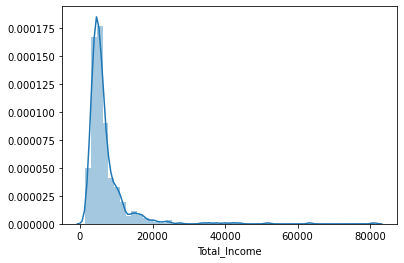

In [300]:
#Now Lets check distribution of total Income
sns.distplot(train['Total_Income'])

In [301]:
#The distribution is shiffted towards left so the daat is right skewed. Lets take a logarithmic transformation to make it normal
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])

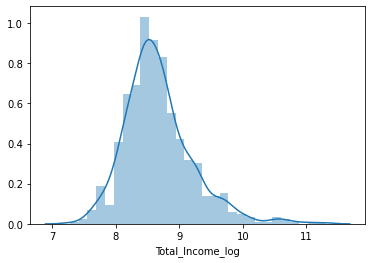

In [302]:
#Now Lets check distribution of total Income
sns.distplot(train['Total_Income_log'])

In [303]:
#Lets Create EMI column
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=train['LoanAmount']/test['Loan_Amount_Term']

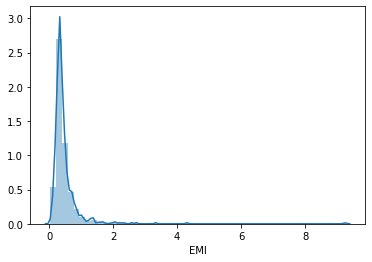

In [304]:
#Lest check the distribusio of EMI Varible
sns.distplot(train['EMI'])

In [307]:
#Lets Create Balance Income Feature
train["Balance_Income"]=train['Total_Income']-(train['EMI']*1000)
test["Balance_Income"]=test['Total_Income']-(test['EMI']*1000)

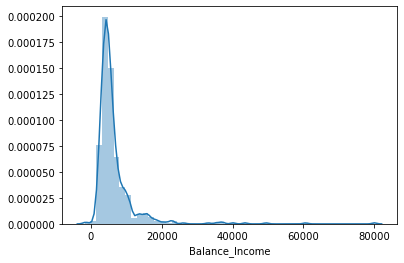

In [308]:
sns.distplot(train['Balance_Income'])

In [309]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance_Income'],
      dtype='object')

In [310]:
train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Total_Income','LoanAmount_log'],axis=1,inplace=True)

In [311]:
test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Total_Income','LoanAmount_log'],axis=1,inplace=True)

In [312]:
train.shape, test.shape

((614, 11), (367, 10))

In [313]:
#Lets ReDefine Our x and y
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [314]:
# Will have to convert the categorical varibles into Dummy variables. 
x_encoded=pd.get_dummies(x,drop_first=True)
train_encoded=pd.get_dummies(train,drop_first=True)
test_encoded=pd.get_dummies(test,drop_first=True)

In [315]:
#Split the data into training and Testing
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_encoded,y,test_size=0.25,random_state=100)

In [316]:
lr=LogisticRegression()
rc=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()

In [319]:
lr_score=cross_val_score(lr,x_encoded,y,cv=5,scoring='accuracy')
rc_score=cross_val_score(rc,x_encoded,y,cv=5,scoring='accuracy')
knn_score=cross_val_score(knn,x_encoded,y,cv=5,scoring='accuracy')
svc_score=cross_val_score(svc,x_encoded,y,cv=5,scoring='accuracy')

In [320]:
print (lr_score)
print ("Logistic Score:",np.round(lr_score.mean(),2))
print (rc_score)
print ("RandomForest Score:",np.round(rc_score.mean(),2))
print (rc_score)
print ("KNN Score:",np.round(knn_score.mean(),2))
print (rc_score)
print ("SVM Score:",np.round(svc_score.mean(),2))

[0.81300813 0.7804878  0.7804878  0.85365854 0.81147541]
Logistic Score: 0.81
[0.7398374  0.73170732 0.76422764 0.78861789 0.81147541]
RandomForest Score: 0.77
[0.7398374  0.73170732 0.76422764 0.78861789 0.81147541]
KNN Score: 0.62
[0.7398374  0.73170732 0.76422764 0.78861789 0.81147541]
SVM Score: 0.68


In [322]:
lr.fit(x_train,y_train)

LogisticRegression()

In [323]:
pred2=lr.predict(x_val)

In [324]:
accuracy_score(y_val,pred2)

0.6103896103896104

In [325]:
lr.fit(x_encoded,y)

LogisticRegression()

In [326]:
sub_pred1=lr.predict(test_encoded)

In [327]:
#We only need LoanID and Loan Status for submission, so will fill those columns in the sample submission file.
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status']=sub_pred1

In [328]:
#We need predictions in 'Y' and 'N' format so lets change it.
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [329]:
#Now lets convert this Datafream to CSV file
pd.DataFrame(submission,columns=["Loan_ID",'Loan_Status']).to_csv('Logistic_Eng.csv',index=0)

In [ ]:
#Test Submission did not improve any Score.